In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [27]:
df = pd.read_csv("retail_sales_dataset.csv")

In [28]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [29]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


<Axes: ylabel='count'>

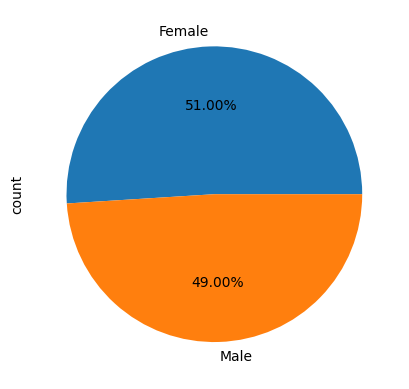

In [30]:
#Pie chart on the basis of gender
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

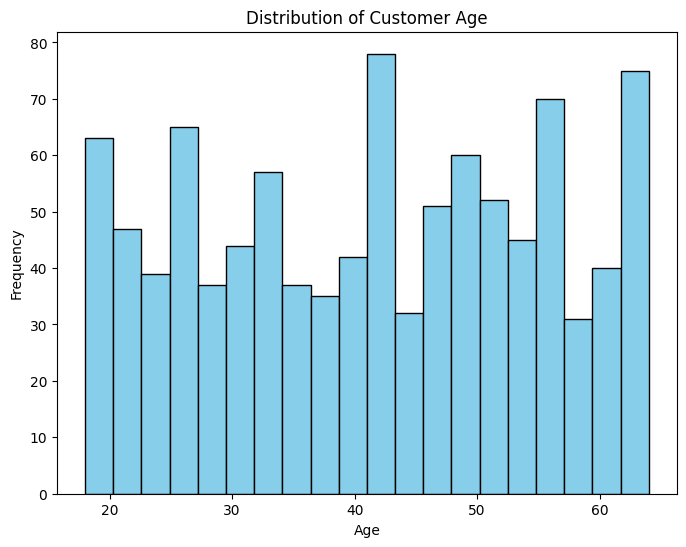

In [31]:
# Distribution of customer age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

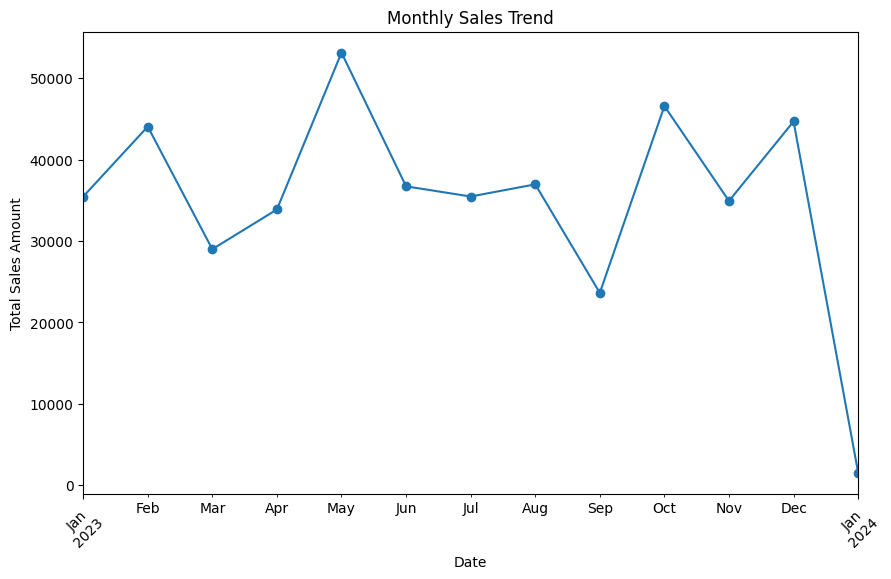

In [32]:
# Sales over time plotting
plt.figure(figsize=(10, 6))
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

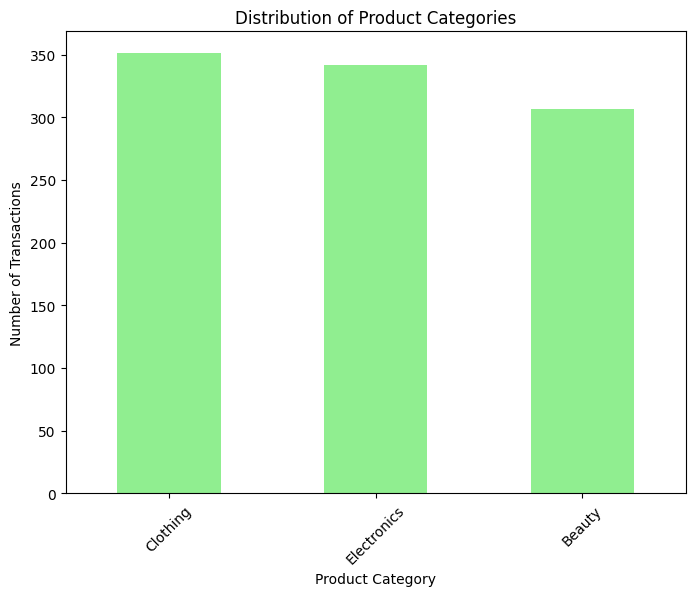

In [33]:
# Product category distribution
plt.figure(figsize=(8, 6))
product_counts = df['Product Category'].value_counts()
product_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

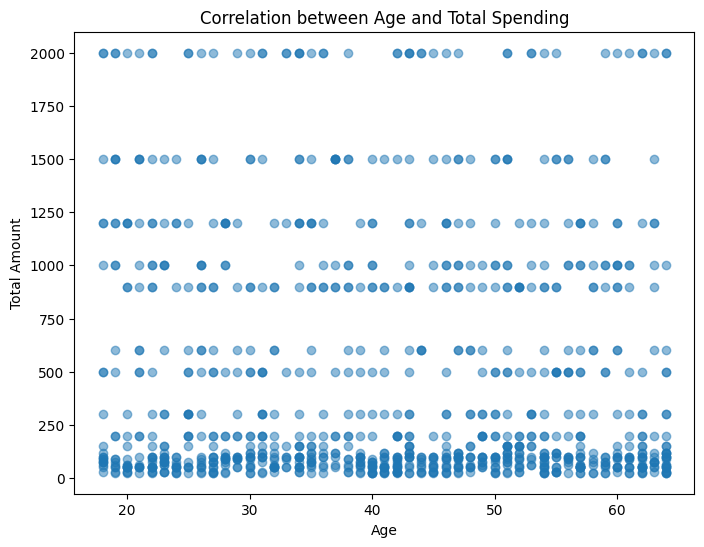

In [34]:
# Correlation between age and total spending
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Correlation between Age and Total Spending')
plt.show()

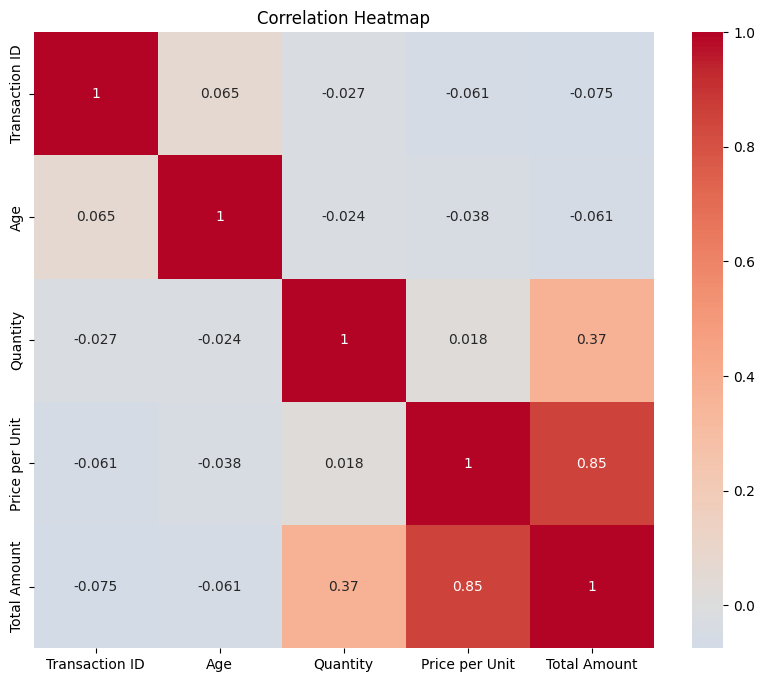

In [35]:
# We need to drop non-numeric columns before calculating correlation matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Recommendation

In [36]:
# Recommendation 1: Target Marketing Efforts
female_avg_spending = df[df['Gender'] == 'Female']['Total Amount'].mean()
male_avg_spending = df[df['Gender'] == 'Male']['Total Amount'].mean()
if female_avg_spending > male_avg_spending:
    print("Recommendation 1: Target marketing efforts towards female customers.")
else:
    print("Recommendation 1: Target marketing efforts towards male customers.")


# Recommendation 2: Customer Engagement
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])
avg_spending = df['Total Amount'].mean()
df['Spending Level'] = df['Total Amount'].apply(lambda x: 'High' if x > avg_spending else 'Low')
customer_segmentation = df.groupby(['Age Group', 'Spending Level']).size().unstack(fill_value=0)
if customer_segmentation.loc['Middle-aged', 'High'] > customer_segmentation.loc['Middle-aged', 'Low']:
    print("Recommendation 2: Focus on personalized marketing strategies for middle-aged customers with high spending.")
else:
    print("Recommendation 2: Implement strategies to increase engagement among middle-aged customers with low spending.")


# Recommendation 3: Product Strategy
product_transaction_counts = df['Product Category'].value_counts()
least_popular_category = product_transaction_counts.idxmin()
print(f"Recommendation 3: Allocate resources towards promoting and improving the '{least_popular_category}' category.")

Recommendation 1: Target marketing efforts towards female customers.
Recommendation 2: Implement strategies to increase engagement among middle-aged customers with low spending.
Recommendation 3: Allocate resources towards promoting and improving the 'Beauty' category.
